Portland
Incomplete data for years:  [1923, 1934, 1935, 1936, 1946, 1956, 1957, 1959, 1961, 1970, 1971, 1990]
Boston
Incomplete data for years:  [1921, 1945, 1974]
Newport
Incomplete data for years:  [1938, 1943, 1946, 1955, 1966, 1967, 1971, 1973, 1974]
Montauk
Incomplete data for years:  [1947, 1959, 1966, 1967, 1969, 1970, 1971, 1972, 1974, 1977, 1982, 1991, 1993, 1994, 2000, 2003, 2004, 2005, 2006]
The Battery
Incomplete data for years:  [1926, 1927, 1958, 1973, 1974, 1975, 1977, 1997, 2001, 2004]
Sandy Hook
Incomplete data for years:  [1932, 1934, 1936, 1939, 1960, 1977, 1981, 2012]
Atlantic City
Incomplete data for years:  [1922, 1959, 1962, 1971, 1974, 1992, 1999, 2002]
Sewells Pt
Incomplete data for years:  [1927, 1943, 1975]
Wilmington NC
Incomplete data for years:  [1935, 1960, 1971, 2000]
Charleston SC
Incomplete data for years:  [1946, 1952, 1966, 1972, 1991]
Fernandina Beach
Incomplete data for years:  [1938, 1952, 1966, 1975, 1994, 1996, 1997, 2003]
Key West
Incomplete da

<Figure size 240.945x141.732 with 0 Axes>

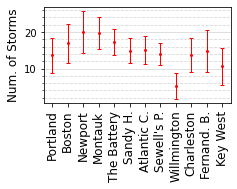

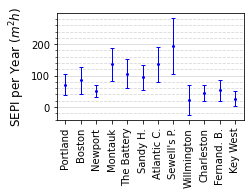

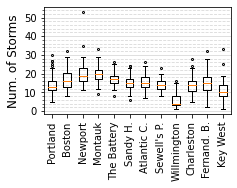

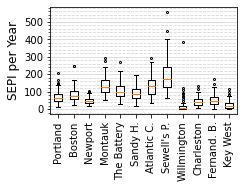

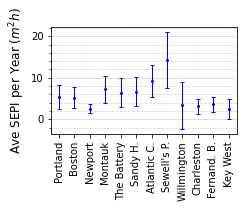

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import shutil
import numpy as np


# Set the path to the directory containing the CSV files
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
dir_path = os.path.join(parent_dir, 'Annual_SEPI_Results')
missing_dir_path = os.path.join(parent_dir, 'Results_Missing_Data')

# Create output folder
folder_name = current_dir
os.makedirs(folder_name, exist_ok=True)
output_path1 = os.path.join(folder_name, "storms_per_station_ave.png")
output_path2 = os.path.join(folder_name, "SEPI_per_year_ave.png")
output_path3 = os.path.join(folder_name, "storms_per_Station_BW.png")
output_path4 = os.path.join(folder_name, "SEPI_per_year_BW.png")
output_path5 = os.path.join(folder_name, "Ave_SEPI_per_year.png")


# Convert millimeters to inches
mm_to_inch = 0.0393701
fig_width_mm = 85
fig_height_mm = 50

fig_width_inch = fig_width_mm * mm_to_inch
fig_height_inch = fig_height_mm * mm_to_inch

# Create the figure with the specified size in millimeters
plt.figure(figsize=(fig_width_inch, fig_height_inch))

# Get a list of all CSV files in the directory
file_names = [f for f in os.listdir(dir_path) if f.endswith('.csv')]
missing_file_names = [f for f in os.listdir(missing_dir_path) if f.endswith('.csv')]

file_names = sorted(file_names)
missing_file_names = sorted(missing_file_names)  
label_list = ["Portland", "Boston", "Newport", "Montauk", "The Battery", "Sandy H.", "Atlantic C.", "Sewell's P.", "Willmington", "Charleston", "Fernand. B.", "Key West"]

# Data from Number of Storms"
ave_vals = []
st_devs = []

# Data from "Total SEPI"
SEPI_ave_vals = []
SEPI_st_devs = []

# Copy the data into an array to calculate further stats for Box and Whiskers Plot
number_data = []
SEPI_data = []

# Ave SEPI per year data
Ave_Annual_SEPI_data = []
Ave_Annual_SEPI_ave_vals = []
Ave_Annual_SEPI_st_devs = []



for i, file_name in enumerate(file_names):

    m_file_name = missing_file_names[i]
    print(m_file_name[3:-12])
    
    # Load the CSV file into a pandas dataframe
    df = pd.read_csv(os.path.join(dir_path, file_name))
    mdf = pd.read_csv(os.path.join(missing_dir_path, m_file_name))

    # Clean the column names
    df.columns = df.columns.str.strip().copy()
    mdf.columns = mdf.columns.str.strip().copy()
    
    total_num_points = 8760
    thr = .1 * 8760        # Only keep if 90% of the data is present
    mdf.loc[:, 'Threshold'] = mdf['# of Missing points'].apply(lambda x: True if x < thr else False).copy()

    # Create an empty list to store the years that satisfy the condition
    years_to_skip = []

    # Iterate through the DataFrame and check the condition
    for index, row in mdf.iterrows():
        if row['Threshold'] is False:
            years_to_skip.append(row['Year'])
            
    #print("Number of Years to Skip = ", len(years_to_skip))
    print("Incomplete data for years: ", years_to_skip)
    
    # Filter the rows of df using the list of years to skip
    df_filtered = df.loc[~df['Year'].isin(years_to_skip)]
    
    ave_storms = df_filtered['Number of Storms'].mean()
    ave_vals.append(ave_storms)
    
    stdev = df_filtered['Number of Storms'].std()
    st_devs.append(stdev)
    
    SEPI_ave = df_filtered['Total SEPI'].mean()
    SEPI_ave_vals.append(SEPI_ave)
    
    SEPI_stdev = df_filtered['Total SEPI'].std()
    SEPI_st_devs.append(SEPI_stdev)
    
    number_data.append(df_filtered['Number of Storms'])
    SEPI_data.append(df_filtered['Total SEPI'])

    # Calculate average value of SEPI per year = total value of annual SEPI / total annual number of storms
    Ave_Annual_SEPI_data = df_filtered['Total SEPI'] / df_filtered['Number of Storms']
    Ave_Annual_SEPI_ave = Ave_Annual_SEPI_data.mean()
    Ave_Annual_SEPI_ave_vals.append(Ave_Annual_SEPI_ave)
    Ave_Annual_SEPI_std = Ave_Annual_SEPI_data.std()
    Ave_Annual_SEPI_st_devs.append(Ave_Annual_SEPI_std)

# First plot - Ave per year
plt.figure(figsize=(fig_width_inch, fig_height_inch))
x = range(len(label_list))
plt.errorbar(x, ave_vals, yerr=st_devs, marker='o', markersize = 2.0, capsize = 2.0, linestyle="None", ecolor='red', markerfacecolor='none', markeredgecolor='red', linewidth=1.0)
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
plt.xticks(x, label_list, rotation='vertical', fontsize=12)
plt.ylabel("Num. of Storms", fontsize = 12)
plt.yticks(fontsize=10)
plt.subplots_adjust(bottom=0.2)
plt.savefig(output_path1, dpi=1000, bbox_inches='tight')
plt.show()
plt.close()


# Second Plot - Total SEPI per year
plt.figure(figsize=(fig_width_inch, fig_height_inch))
plt.ylabel("Total SEPI per Year ($m^2 h$)", fontsize = 22)
plt.errorbar(x, SEPI_ave_vals, yerr=SEPI_st_devs, marker='o', markersize = 2.0, capsize=2.0, linestyle="None", ecolor='blue', markerfacecolor='none', markeredgecolor='blue', linewidth=1.0)
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20))
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.xticks(x, label_list, rotation='vertical', fontsize=10)
plt.ylabel("SEPI per Year ($m^2 h$)", fontsize = 12)
plt.yticks(fontsize=10)
plt.savefig(output_path2, dpi=1000, bbox_inches='tight')
plt.tick_params(axis='both', labelsize=10)
plt.show()
plt.close()

# Third Plot - Box and Whiskers Plot for Storms per Station
plt.figure(figsize=(fig_width_inch, fig_height_inch))
plt.boxplot(number_data, labels = label_list, flierprops={'markersize': 2})
x_ticks = np.arange(1, len(label_list) + 1)
plt.xticks(x_ticks, label_list, rotation='vertical', fontsize=10)
plt.ylabel("Num. of Storms", fontsize = 12)
# Customize the gridlines and labels
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
plt.yticks(fontsize=10)
plt.savefig(output_path3, dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

# Forth Plot - Box and Whiskers Plot for Storms per Station
plt.figure(figsize=(fig_width_inch, fig_height_inch))
plt.boxplot(SEPI_data, labels = label_list, flierprops={'markersize': 2})
x_ticks = np.arange(1, len(label_list) + 1)
plt.xticks(x_ticks, label_list, rotation='vertical', fontsize=10)
plt.ylabel("SEPI per Year", fontsize = 12)
plt.yticks(fontsize=10)
# Customize the gridlines and labels
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20))
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.savefig(output_path4, dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

# 5th Plot - Ave SEPI per year
plt.figure(figsize=(fig_width_inch, fig_height_inch))
plt.ylabel("Ave SEPI per Year ($m^2 h$)", fontsize = 22)
plt.errorbar(x, Ave_Annual_SEPI_ave_vals, yerr=Ave_Annual_SEPI_st_devs, marker='o', markersize = 2.0, capsize=2.0, linestyle="None", ecolor='blue', markerfacecolor='none', markeredgecolor='blue', linewidth=1.0)
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(2))
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
plt.xticks(x, label_list, rotation='vertical', fontsize=10)
plt.ylabel("Ave SEPI per Year ($m^2 h$)", fontsize = 12)
plt.yticks(fontsize=10)
plt.savefig(output_path5, dpi=1000, bbox_inches='tight')
plt.tick_params(axis='both', labelsize=10)
plt.show()
plt.close()